<a href="https://colab.research.google.com/github/ironcevic/modelling_week11/blob/main/Practical12_13Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install conda
!pip install -q condacolab
import condacolab
condacolab.install()

# install quantum espresso from conda
!conda install conda-forge::qe
!pip install ase

# import functions that we will need
from functions import *

# all of this will take 1 min


In [ ]:
"""
Inspect the si.scf.in and si.dos.in input files. What differences can you find
relative to the 1D polymer from the previous lab? How many k-points will the
SCF calculation involve?
Using the provided code, run:
1. The SCF calculation.
2. The DOS post-processing calculation.
3. The "optics" calculation that determins epsilon.
This will take about 13 min.
"""

!pw.x < si.scf.in > si.scf.out
!dos.x < si.dos.in > si.dos.out
!epsilon.x < si.epsilon.in > si.epsilon.out

In [ ]:
"""
Now we shall run a non-SCF calculation along the high-symmetry lines to get the
data necessary to plot the band structure. To determine the high-symmetry lines,
upload your si.scf.in file to  https://seekpath.materialscloud.io/. Then, paste
the result into your si.nscf.in file. Calculations will take about 5 min.
"""
!pw.x < si.nscf.in > si.nscf.out # nSCF run along band paths
!bands.x < si.bands.in > si.bands.out

In [ ]:
"""
We will first plot the density of states to see what we are working with. To do
this, define the variables fermi_level (look in the scf.out) and range (how many
eV on either side to include in the dos plot), and then run plot_dos.
"""
dos = np.genfromtxt("si.dos", skip_header=1)
# fermi_level =     # put a number here
# range =           # put a number here

# plot_dos(dos, fermi_level, range) # plot the dos with the params from above


In [ ]:
"""
1. Now we will plot the band structure. As above, define fermi_level and range
and then run the code below.
2. Use the band structure to estimate the band gap of Si. Is it direct or
indirect? At which energy do you expect the onset of electronic transitions?
Hint: you can use the range variable to "zoom in".
"""

bands = np.genfromtxt("si.bands.dat.gnu") # create the bands object
bands = np.split(bands, 12)               # split it into 12 bands

# fermi_level =     # put a number here
# range =           # put a number here

# here below we shall plot the band structure
for band in bands:
    x = band[:, 0]
    y = band[:, 1]
    # can you figure out what the four lines below do?
    if np.all(y < fermi_level):
        plt.plot(x, y, color=colours["blue"])
    else:
        plt.plot(x, y, color=colours["orange"])
plt.axhline(y=fermi_level, color='k', linestyle='--')
plt.xlim(0, 4.5)
plt.ylim(fermi_level - range, fermi_level + range)
steps = np.array([0, 46, 16, 47, 39, 32, 23])
x_coords = [bands[0][i, 0] for i in [0, 45, 61, 62, 109, 149, 179, 201]]
plt.vlines(x_coords, -20, 30, colors='grey', alpha = 0.5, linestyles="--")
plt.xticks(x_coords, ["Γ", "X", "U K", "", "Γ", "L", "W", "X"])
plt.ylabel("energy (eV)")
plt.show()



In [ ]:
"""
1. Determine the band gap of Si using the bands object. Here are some hints:
You can access the nth band with band[n].
You can get the band energies with band[n][:,1].
You can use np.min() and np.max() to get the minimum and maximum values of an
array.
2. Silicon has an indirect 1.12 eV band gap. What is the band gap you get here?
How does our result  affect our predictions of optical properties?
3. Now inspect the si.epsilon.in file. We have played a trick - can you spot it?
"""
# VBM = ...
# CBM = = ...
gap = CBM - VBM
print(f"The band gap is {gap:.2f} eV.")

In [ ]:
"""
Let us take a look at spectroscopic ellipsometry results (n and k) for Si. This
block loads experimental data from the provided csv file into variables:
- exp_energies # list of energies for which n and k are determined
- exp_n        # n value for each energy
- exp_k        # k value for each energy
"""
exp_eps = np.genfromtxt("si_exp.csv", skip_header=1, delimiter=",")
exp_eps = exp_eps.T
exp_energies = 1.23984 / exp_eps[0] # energies in eV
exp_n = exp_eps[1]  # experimental index of refraction
exp_k = exp_eps[2]  # experimental extinction coefficient

"""
Now use the equations provided in section 3.3 of this practical to determine the
Si dielectric function from the experimental values for k and n. A few hints:
"+" and "-" are used for addition and subtraction, e.g. 2 + 3 = 5
"*" is used for multiplication, e.g. 2 * 3 = 6
"**2" is used for squaring, e.g. 3**2 = 9
"""

# exp_eps_1 =
# exp_eps_2 =




In [ ]:
"""
Now let us take a look at our QE results. QE gives us eps_1 and eps_2 directly.
"""
dft_energies = np.genfromtxt("epsi_si.dat", skip_header=2).T[0]
dft_eps_1 = np.genfromtxt("epsr_si.dat", skip_header=2).T[1]
dft_eps_2 = np.genfromtxt("epsi_si.dat", skip_header=2).T[1]


In [ ]:
"""
Now we are ready to compare our experimental and computed dielectric functions.
Insert correct x and y arrays into the commented lines below to plot eps_1.
"""
# First we shall plot the real part of the dielectric function.
# plt.plot(x_here, y_here, color=colours["orange"], label="DFT")
# plt.plot(x_here, y_here, color=colours["blue"], label="Experimental")
plt.legend(loc="upper left", frameon=False)
plt.title(f"Re($\\epsilon$)")
plt.xlabel("energy (eV)")
plt.ylabel("$\\epsilon_1$")
plt.show()

In [ ]:
"""
Now the plot the imaginary part on your own. Try reusing the code from above.
"""



In [ ]:
"""
Compare the experimental and DFT-computed values of the the relative
permittivity, eps_r. This is the value of the real dielectric function in the
static limit, at energy = 0. Use the objects we have defined above to
determine it.
"""

# eps_r_exp = ...
# eps_r_dft = ...
print(f"The experimental value of \u03b5\u1d63 is: {eps_r_exp:.2f}.")
print(f"The DFT-calculated value of \u03b5\u1d63 is: {eps_r_dft:.2f}.")

In [ ]:
"""
Silicon does not absorb directly below 3.4 eV. Humans see around 1.6-3.1 eV.
This means that the colour of silicon is determined by its reflectance R.
Use the equations provided in the practical section 3.3 to compute R of silicon,
and then plot the experimental and computed reflectance using the provided code.
What is the colour of Si? Hint: square root can be computed as np.sqrt(x).
"""
# Experimental reflectance:
# exp_R = ...

# DFT reflectance:
# eps_mod = ...
# dft_n = ...
# dft_k = ...
# dft_R = ...

# Now let us compare the experimental and DFT-computed reflectance.
plt.plot(exp_energies, exp_R, color=colours["blue"], label="Experimental")
plt.plot(dft_energies, dft_R, color=colours["orange"], label="DFT")
plt.vlines(1.6, 0, 1, color="gray", linestyle="--")
plt.vlines(3.1, 0, 1, color="gray", linestyle="--")
plt.legend(loc="upper left", frameon=False)
plt.title("Reflectance")
plt.xlabel("energy (eV)")
plt.ylabel("$R$")
plt.ylim(0.2, 0.7)
plt.xlim(0, 5)
plt.show()



In [ ]:
"""
Head to https://next-gen.materialsproject.org/ and inspect the band
structure and density of states for Si. How do they compare to our calculations?
"""

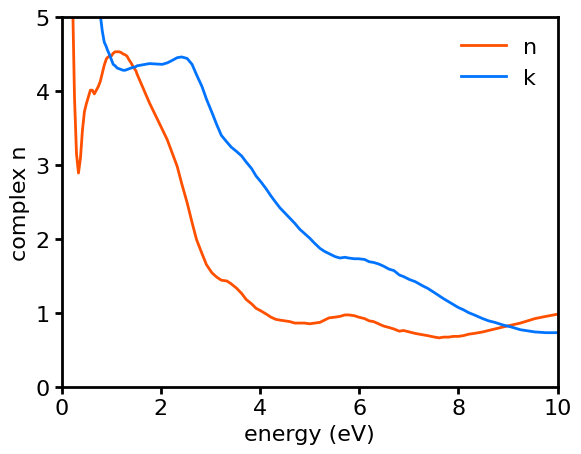

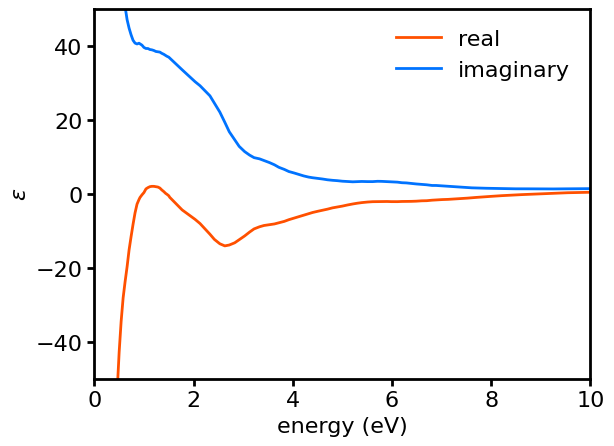

In [ ]:
"""
In the final part of this tutorial, we shall take a look at the dielectric
function of chromium (Cr), a metal.
1. To start, inspect the band structure and DOS of Cr at MaterialsProject. How
does it differ from the systems we looked at until now?
2. What are your expectations for the dielectric function of Cr?
3. Now, reuse the code from above to plot the n, k, eps_1, and eps_2 of Cr.
4. Why are metals shiny?
"""

exp_eps = np.genfromtxt("cr_exp.csv", skip_header=1, delimiter=",")
exp_eps = exp_eps.T
exp_energies = exp_eps[0] # energies in eV
exp_n = exp_eps[1]  # experimental index of refraction
exp_k = exp_eps[2]  # experimental extinction coefficient
exp_eps_2 = 2 * exp_n * exp_k
exp_eps_1 = exp_n**2 - exp_k**2

plt.plot(exp_energies, exp_n, color=colours["orange"], label="n")
plt.plot(exp_energies, exp_k, color=colours["blue"], label="k")
plt.legend(loc="upper right", frameon=False)
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel("energy (eV)")
plt.ylabel("complex $n$")
plt.show()

plt.plot(exp_energies, exp_eps_1, color=colours["orange"], label="real")
plt.plot(exp_energies, exp_eps_2, color=colours["blue"], label="imaginary")
plt.legend(loc="upper right", frameon=False)
plt.xlim(0, 10)
plt.ylim(-50, 50)
plt.xlabel("energy (eV)")
plt.ylabel("$\\epsilon$")
plt.show()

In [ ]:
!mv * solved

mv: cannot move 'solved' to a subdirectory of itself, 'solved/solved'
